# Naive Bayes Classification

## Problem Statement
Given the details of an individual classify the salary is greater than 50K or not

In [1]:
# Importing required libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score
from io import StringIO
%matplotlib inline

## Dataset

The dataset contains various details of individuals along with their salary classified either greater than 50K or less.

- __Age__: continuous. 
- __Workclass__: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- __Fnlwgt__: continuous. 
- __Education__: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- __Education-num__: continuous. 
- __Marital-status__: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- __Occupation__: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- __Relationship__: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- __Race__: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- __Sex__: Female, Male. 
- __Capital-gain__: continuous. 
- __Capital-loss__: continuous. 
- __Hours-per-week__: continuous. 
- __Native-country__: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- __Income__: >50K, <=50K.

## Data Analysis

In [2]:
income_data = pd.read_csv('income_evaluation.csv')

* ### Checking Data

In [3]:
income_data.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
income_data.shape

(32561, 15)

In [5]:
income_data.describe(include='O')

,Workclass,Education,Marital-status,Occupation,Relationship,Race,Sex,Native-country,Income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


We can see how many unique and frequency of majority values in each categorical column are present

In [6]:
income_data.describe()

,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


We can check standard deviation, mean adn other values of all continuous columns present in the dataset

* ### Checking DataType

In [7]:
income_data.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education-num      int64
Marital-status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital-gain       int64
Capital-loss       int64
Hours-per-week     int64
Native-country    object
Income            object
dtype: object

we have to encode the categorical features later

* ### Testing For Null Values

In [10]:
income_data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education-num     0
Marital-status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
Native-country    0
Income            0
dtype: int64

Dataset has no null values

In [11]:
income_data.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education-num     0
Marital-status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
Native-country    0
Income            0
dtype: int64

Dataset has no NA values

* ### Checking distribution of Target Variable

In [12]:
Target_ratio = income_data['Income'].value_counts()/len(income_data)
print(Target_ratio)

Income
<=50K    0.75919
>50K     0.24081
Name: count, dtype: float64


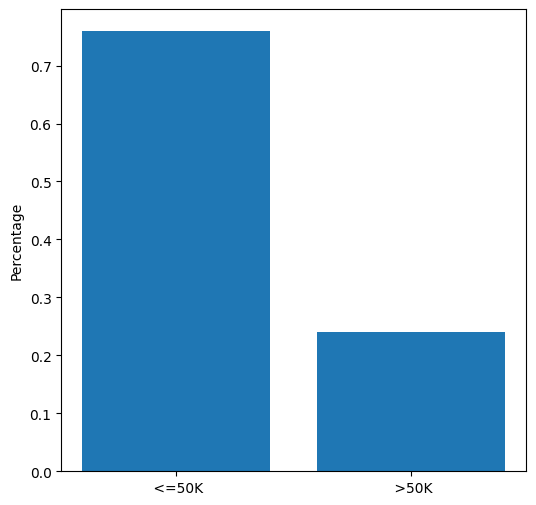

In [13]:
# Checking for data unbalance
plt.figure(figsize=(6,6))
plt.bar(Target_ratio.index, Target_ratio)
plt.ylabel('Percentage')
plt.show()

Dataset has around 24% of entries where income is >50K

* ### Enconde Target Variable

In [14]:
lb = LabelEncoder()
income_data.Income = lb.fit_transform(income_data.Income)

In [15]:
lb.classes_

array([' <=50K', ' >50K'], dtype=object)

There are two classes in the dataset

* ### Convert Categorical Features

In [16]:
cat_features = income_data.columns[income_data.dtypes=='O']
print(*cat_features, sep=" | ") # * is a wildcard to print a list, where parameter sep is used to define a separator

Workclass | Education | Marital-status | Occupation | Relationship | Race | Sex | Native-country


We will perform dummitization on these

In [17]:
new_data = pd.get_dummies(income_data, columns=cat_features)

In [19]:
new_data.shape

(32561, 109)

In [20]:
new_data.head()

,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Income,Workclass_ ?,Workclass_ Federal-gov,Workclass_ Local-gov,...,Native-country_ Portugal,Native-country_ Puerto-Rico,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


* ### Training and Testing Data

In [37]:
X = new_data.drop(columns=['Income'])
y = new_data.Income

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

## Naive Bayes Training

There are three types of naive bayes in scikit learn:

>__Bernoulli__</a>: Bernoulli Naīve Bayes is designed for binary/boolean features and discrete data. Key hyperparameters to be considered before training a bayesian model:
    - __alpha__: A float value to determine laplace smoothin parameter which is __1.0__ by default. When set to __0__, no smoothing is present
    - __binarize__: An optional float value which is threshold for binarizing of sample features. If __None__, input data is already considered to have binary features.


>__Gaussian__</a>: Gaussian Naīve Bayes which can be used when target variable is continous and features follow a normal distribution.
    - __var_smoothing__: An optional float value to determine how much portion of largest variance should be added to variances for statbility calculation.

>__Multinomial__</a>: Multinomial Naīve Bayes is used for dicrete counts. Generally, used for text classification.
    - __alpha__: A float value to determine laplace smoothin parameter which is __1.0__ by default. When set to __0__, no smoothing is present.

Assuming Data to be normally distributed we will apply the gaussian model and the data can also be fit into bernoulli model

* ### Training Gaussian Naive Bayes

In [39]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)

GaussianNB()

* ### Training Bernoulli Naive Bayes

In [40]:
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X_train, y_train)

BernoulliNB()

## Accuracy Score

* ### Gaussian Naive Bayes 

In [41]:
pred = gaussian_nb.predict(X_test)
acc_gnb = accuracy_score(y_test, pred)
print("Accuracy Score: ", acc_gnb)

Accuracy Score:  0.7974204115057836


* ### Bernoulli Naive Bayes

In [42]:
pred = bernoulli_nb.predict(X_test)
acc_bnb = accuracy_score(y_test, pred)
print("Accuracy Score: ", acc_bnb)

Accuracy Score:  0.7602620534343331


<BarContainer object of 2 artists>

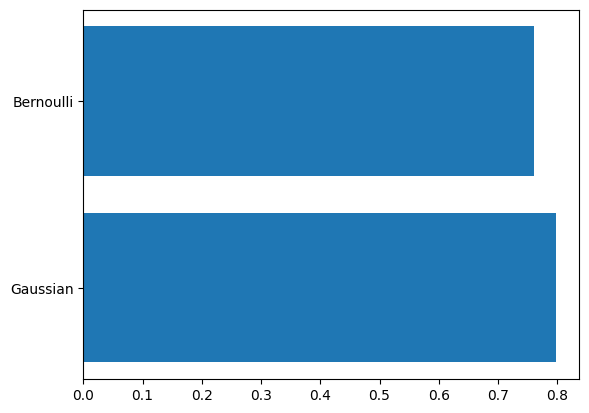

In [43]:
plt.barh(['Gaussian', 'Bernoulli'], [acc_gnb, acc_bnb])

Gaussian has better accuracy than gaussian